# Brazil Housing
### Work From Home: The New Normal
* Work From Home (WFH) has become the new normal for workers around the world.
* Several companies are allowing at least 40% of their employees to work from home permanently.

### Choices of Cities to Live and Work
* Rio De Janeiro and Sao Paulo are among the most expensive cities to live in Brazil.
* Many people from these cities are considering relocating to a different city to live and work remotely.

### Brazil Housing
Castro Brazil Inc., a top real estate management firm with a nationwide presence in Brazil, wishes to help people choose an alternate city to relocate to.   
As a data analyst, help the firm figure out suitable cities for relocation for bachelors, for mid-sized families and for large families.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


#### Level 0: Understanding the Data

In [3]:
df.shape

(10692, 13)

In [4]:
for col in df:
    print(col)

city
area
rooms
bathroom
parking spaces
floor
animal
furniture
hoa (R$)
rent amount (R$)
property tax (R$)
fire insurance (R$)
total (R$)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [7]:
def separate_data_types(df):
    Categorical = []
    Continous = []
    
    for column in df.columns:
        if df[column].dtypes == object:
            Categorical.append(column)
        else:
            Continous.append(column)
    return Categorical, Continous
Categorical, Continous = separate_data_types(df)

table = [Categorical, Continous]
print(tabulate({'Categorical':Categorical, 'Continous':Continous}, headers=['Categorical', 'Continous']))

Categorical    Continous
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


In [8]:
def info_of_cat(col):
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is: {df[col].mode()[0]}")
    print(f"Total count of Missing values of {col} is: {df[col].isnull().sum()}")

In [9]:
def info_of_num(col):
    print(f"The Mean of the {col} is: {df[col].mean()}")
    print(f"The Median of the {col} is: {df[col].median()}")
    print(f"The Mode of the {col} is: {df[col].mode()[0]}")
    print(f"The Standard Deviation of the {col} is: {df[col].std()}")
    print(f"Number of Missing values in {col} is: {df[col].isnull().sum()}")

#### Level 1: Univariate Analysis

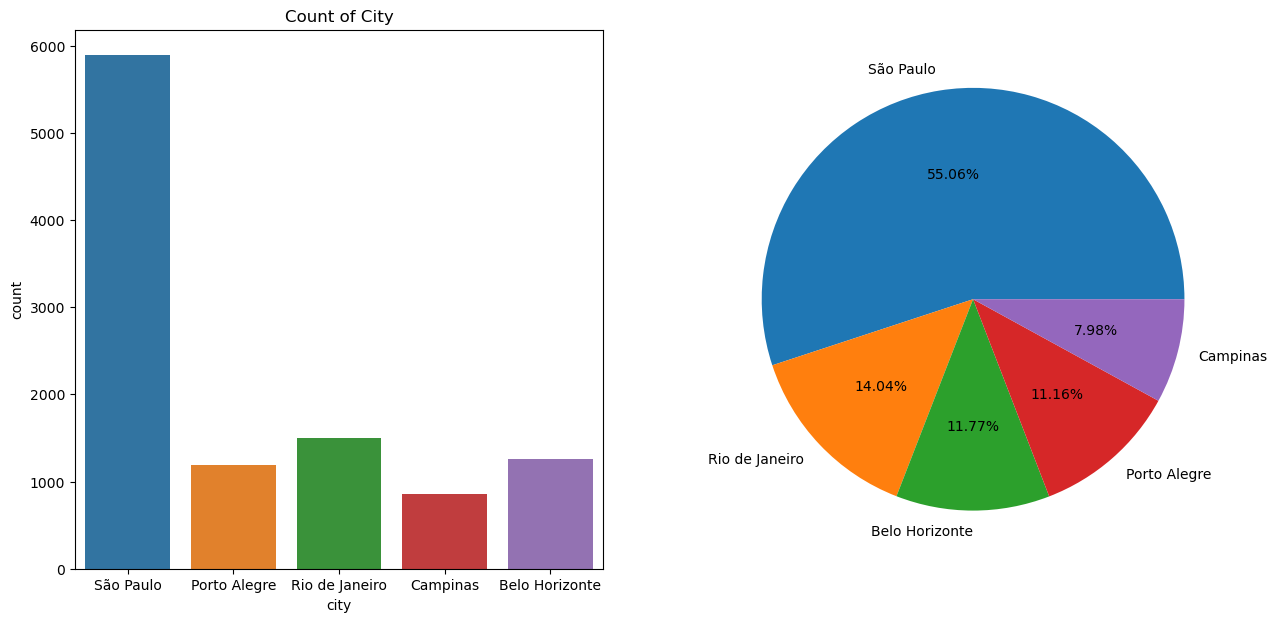

In [10]:
#Univariate of City
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Count of City")
percentage = df['city'].value_counts()
labels = list(df['city'].value_counts().index)

sns.countplot(x=df['city'], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%.2f%%")
plt.show()

__Interpretation :__   
1. We don't want expensive cities for Work From Home.   
2. Rio De Janeiro and Sao Paulo are among the most expensive cities to live in Brazil.   
3. We have to exclude this 2 expensive cities.   
4. Porto Alegre, Campinas and Belo Horizonte are less expensive than Rio De Janeiro and Sao Paulo in Brazil.

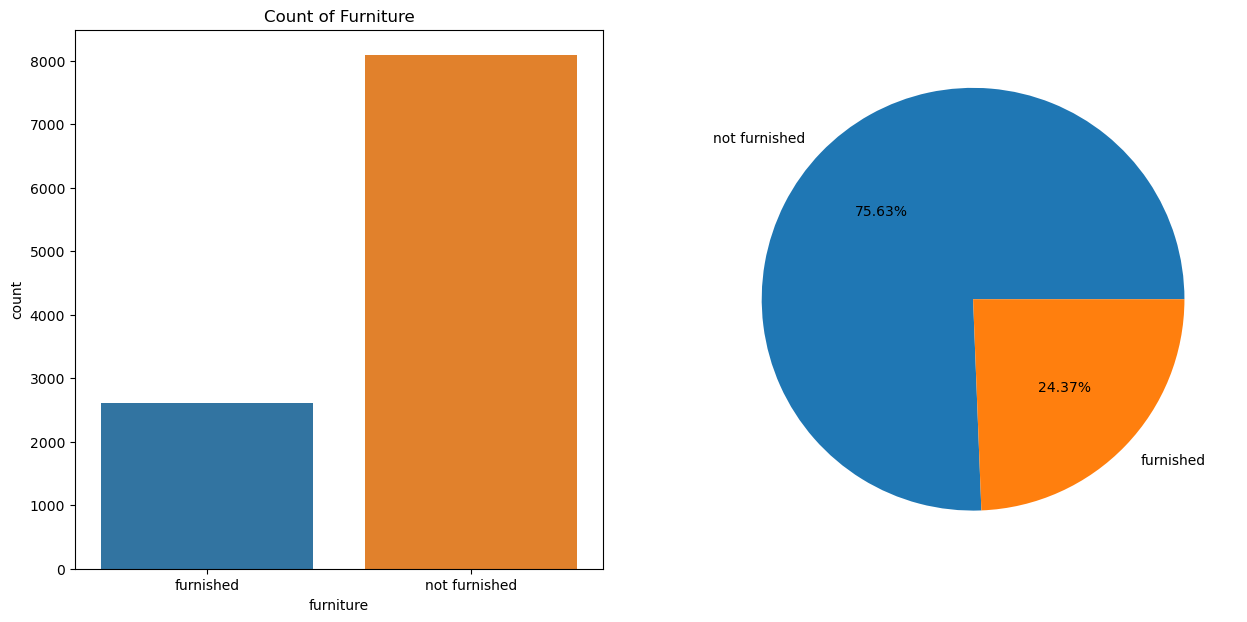

In [11]:
#Univariate of Furniture
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Count of Furniture")
percentage = df['furniture'].value_counts()
labels = list(df['furniture'].value_counts().index)

sns.countplot(x=df['furniture'], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%.2f%%")
plt.show()

__Interpretation :__   
There are less Furnished rooms than Not-Furnished rooms.   
Furnished rooms are only 24.37%.

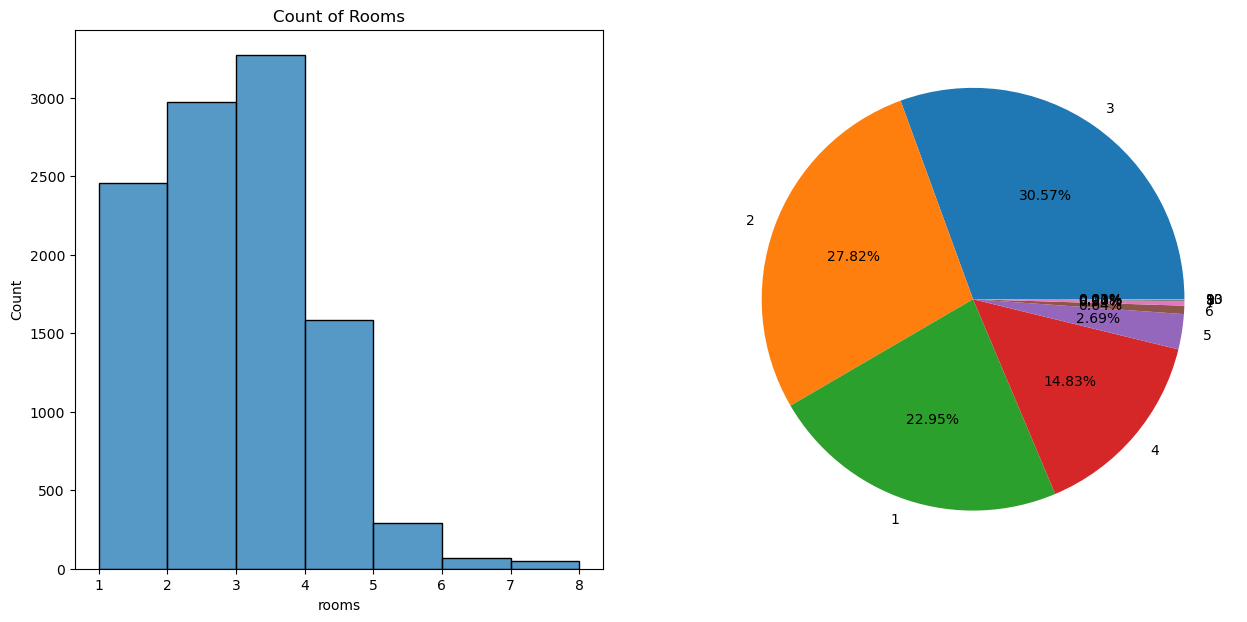

In [12]:
#Univariate of Rooms
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Count of Rooms")
percentage = df['rooms'].value_counts()
labels = list(df['rooms'].value_counts().index)
bins = [1,2,3,4,5,6,7,8]

sns.histplot(x=df['rooms'], ax=ax[0], bins=bins)
plt.pie(percentage, labels=labels, autopct="%.2f%%")
plt.show()

__Interpretation :__   
1. There are 10 and 13 rooms are also available but are in very less number. So, we only take till 8 rooms availability.   
2. 3 rooms availability is high than others which is 30.5%. So, this room is best for Big family.   
3. 2 rooms availability is 2nd highest which is 27.8%. So, this room is best for Mid-family and for Bachelors also.

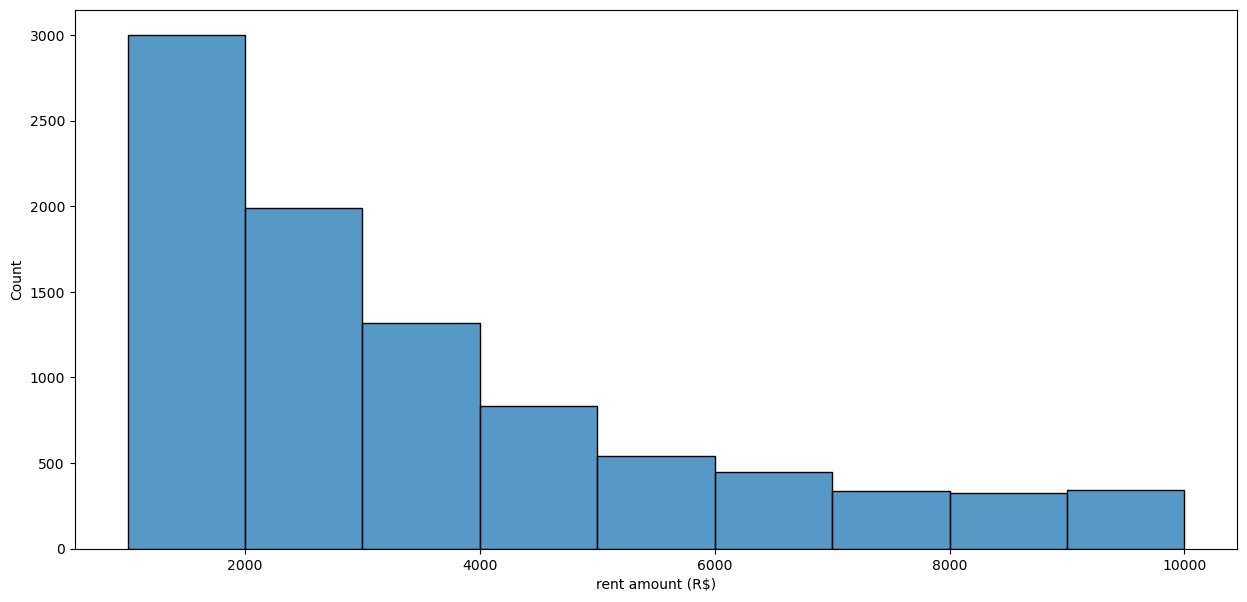

In [47]:
#Univariate of Rent Amount (R$)
fig, ax = plt.subplots(figsize=(15,7))
bins = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]

sns.histplot(x=df['rent amount (R$)'], bins=bins)
plt.show()

__Interpretation :__   
1. Maximum rent amount is less than R$ 3000.   
2. The graph show Right Skewed.   
3. Bachelors and Mid-family will go that rooms which has rent amount less than 3000.

#### Level 2: Bi-variate Analysis
_Cat-Cat Analysis_

In [13]:
#Filterding the data without taking expensive Cities.
data = df[(df.city != 'São Paulo') & (df.city != 'Rio de Janeiro')]
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


City vs Furniture

In [14]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is: São Paulo
Total count of Missing values of city is: 0


In [15]:
info_of_cat('furniture')

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is: not furnished
Total count of Missing values of furniture is: 0


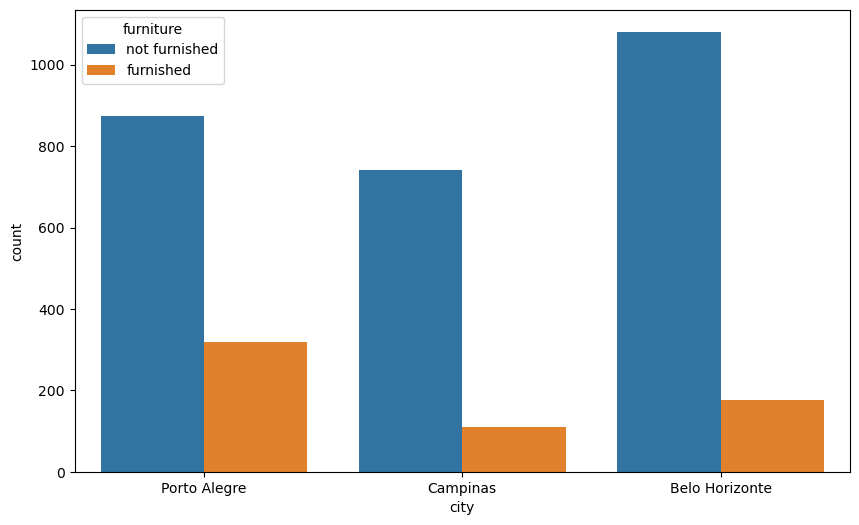

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='city', hue='furniture', data=data)
plt.show()

__Interpretation :__   
1. Not-furnished rooms are greater than Furnished rooms in all cities.   
2. Belo Horizonte has the highest number of not-furnished rooms.   
3. Porto Alegre has the highest number of furnished rooms.   
4. Furnished rooms are more expensive than not-furnished rooms.   
5. Bachelors and Mid-family dont want Furnished rooms. So, both will go for not-furnished rooms.       
6. For Big Family, already furnished rooms are best.

City vs Rooms

In [17]:
info_of_num('rooms')

The Mean of the rooms is: 2.506079311634867
The Median of the rooms is: 2.0
The Mode of the rooms is: 3
The Standard Deviation of the rooms is: 1.171266254098269
Number of Missing values in rooms is: 0


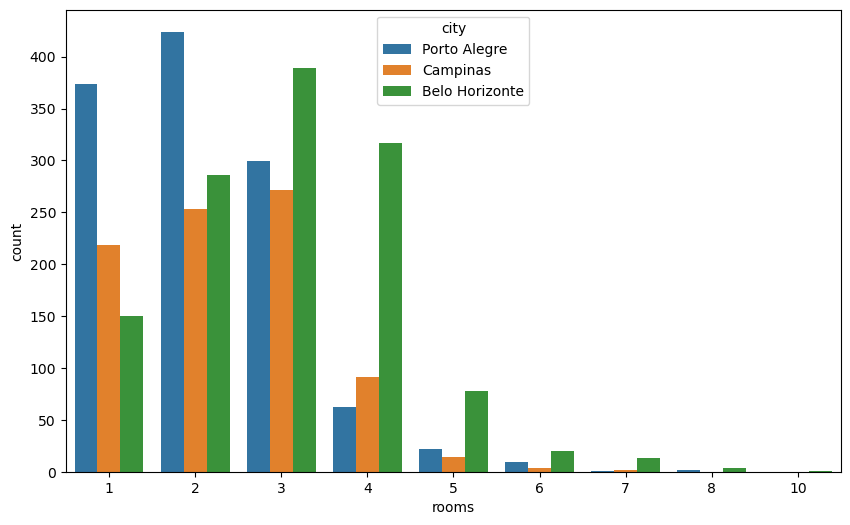

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='rooms', hue='city', data=data)
plt.show()

__Interpretation :__   
1. In Porto Alegre city, 2 rooms are max which is around 450 and are easily available for Bachelors and Mid-family.   
2. In Campinas and Belo Horizonte city, 3, 4 rooms are max and are easily available for Big family.

Rooms vs Furniture

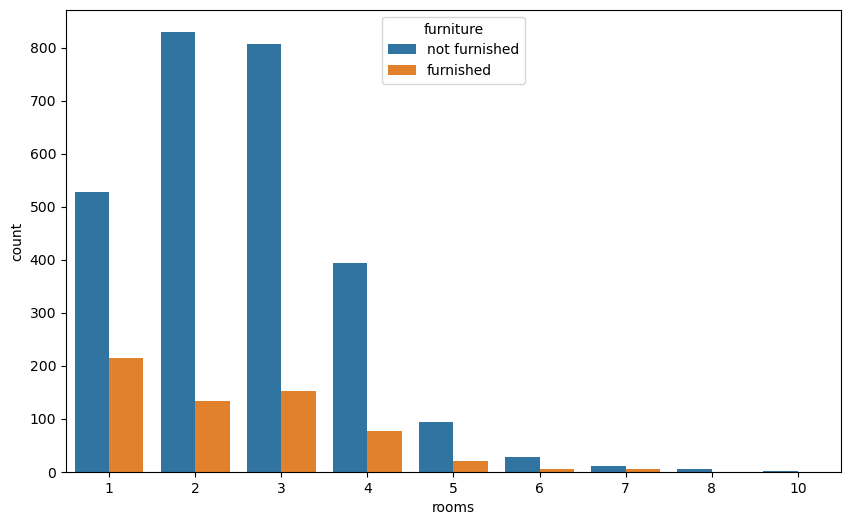

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='rooms', hue='furniture', data=data)
plt.show()

__Interpretation :__   
1. Only 1 room has high count of Furnished rooms availability which is 200.   
2. 2 and 3 rooms are high count for Not-furnished.   
3. Not-furnished rooms are greater than Furnished rooms.   
4. Usually Bachelors and Mid-family don't want Furnished rooms. So, both will go for 2 and 3 rooms which have Not-furnished room count high.   
5. For Big family, Furnished room is best. So, Furniture is available in 1,2,3,4 and 5 rooms. 1 and 2 rooms availability is not good for Big family, so they will try for 3, 4 and 5 rooms availabilty.

_Cat-Num Analysis_

City vs Rent Amount (R$)

In [20]:
info_of_num('rent amount (R$)')

The Mean of the rent amount (R$) is: 3896.247194163861
The Median of the rent amount (R$) is: 2661.0
The Mode of the rent amount (R$) is: 2500
The Standard Deviation of the rent amount (R$) is: 3408.5455176710816
Number of Missing values in rent amount (R$) is: 0


In [21]:
max_r = data['rent amount (R$)'].max()
max_r

19000

In [22]:
min_r = data['rent amount (R$)'].min()
min_r

450

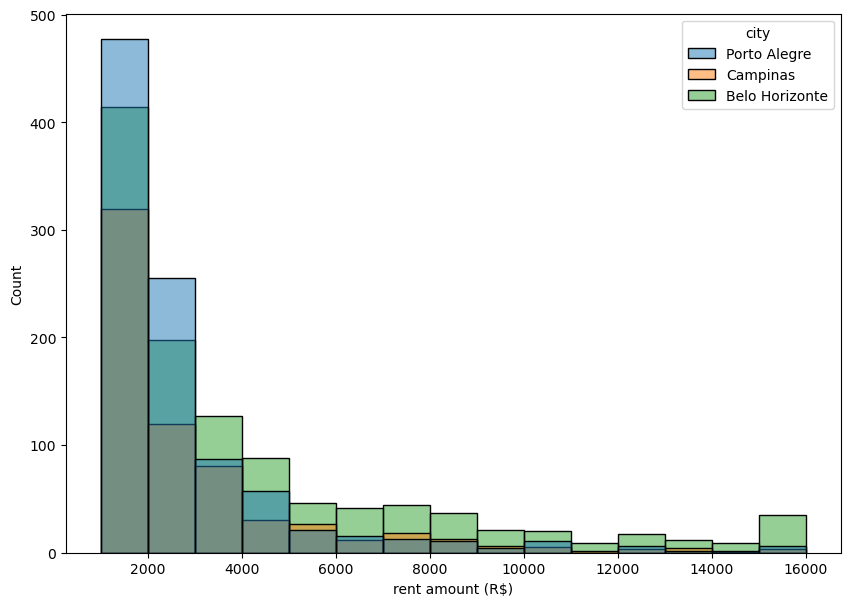

In [30]:
fig, ax = plt.subplots(figsize=(10,7))
bins = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000]
#bins = np.arange(1000,20000,1000)

sns.histplot(x='rent amount (R$)', hue='city', data=data, bins=bins)
plt.show()

__Interpretation :__   
The City vs Rent Amount graph shows us Right skewed.   
Porto Alegre city has the maximum rooms availability which is less than R$ 2000.

City vs Total (R$)

In [24]:
info_of_num('total (R$)')

The Mean of the total (R$) is: 5490.4869996258885
The Median of the total (R$) is: 3581.5
The Mode of the total (R$) is: 2555
The Standard Deviation of the total (R$) is: 16484.72591235027
Number of Missing values in total (R$) is: 0


In [25]:
group = data.groupby(['city'])[['total (R$)']].mean()
group

,total (R$)
city,
Belo Horizonte,6315.242448
Campinas,3173.276671
Porto Alegre,2989.782900


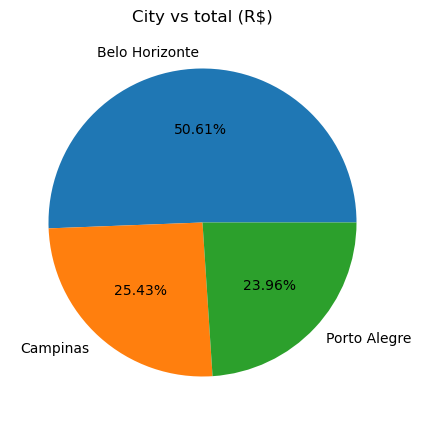

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
plt.title("City vs total (R$)")
percentage = group['total (R$)']
labels = group.index

plt.pie(percentage, labels=labels, autopct="%.2f%%")
plt.show()

__Interpretation :__   
1. Percentage and Average value of Belo Horizonte city is high which include (hoa, rent amount, property tax & fire insurance). So, Belo Horizonte city is best for Big family.   
2. Campinas and Porto Alegre both cities are near to each other for total amount. So, both cities are best for Bachelors and Mid-family.

Rooms vs Rent Amount (R$)

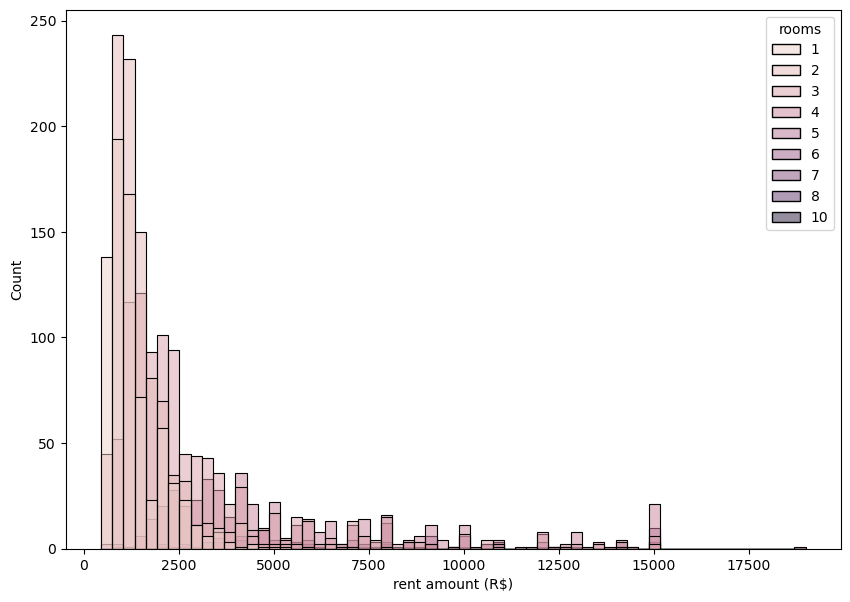

In [48]:
fig, ax = plt.subplots(figsize=(10,7))
#bins = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000]
#bins = np.arange(1000,20000,1000)

sns.histplot(x='rent amount (R$)', hue='rooms', data=data)
plt.show()

__Interpretation :__   
Right skewed present in graph.   
Maximum rooms under R$ 2500.

#### Level 3: Multivariate Analysis

In [41]:
DF = data[(data.furniture == 'not furnished') & 
          (data.rooms <= 2) & 
          (data['rent amount (R$)'] <= 2500) & 
          (data.bathroom <=2)]
DF

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
27,Belo Horizonte,64,2,2,1,11,acept,not furnished,352,1500,80,20,1952
35,Porto Alegre,38,1,1,2,11,not acept,not furnished,450,1750,0,26,2226
43,Belo Horizonte,45,1,1,1,5,acept,not furnished,500,1631,192,12,2335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,Belo Horizonte,65,2,1,1,1,acept,not furnished,200,1100,70,15,1385
10648,Belo Horizonte,80,2,1,1,3,not acept,not furnished,240,1200,67,16,1523
10661,Campinas,250,1,2,2,0,acept,not furnished,0,2200,602,34,2836
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447


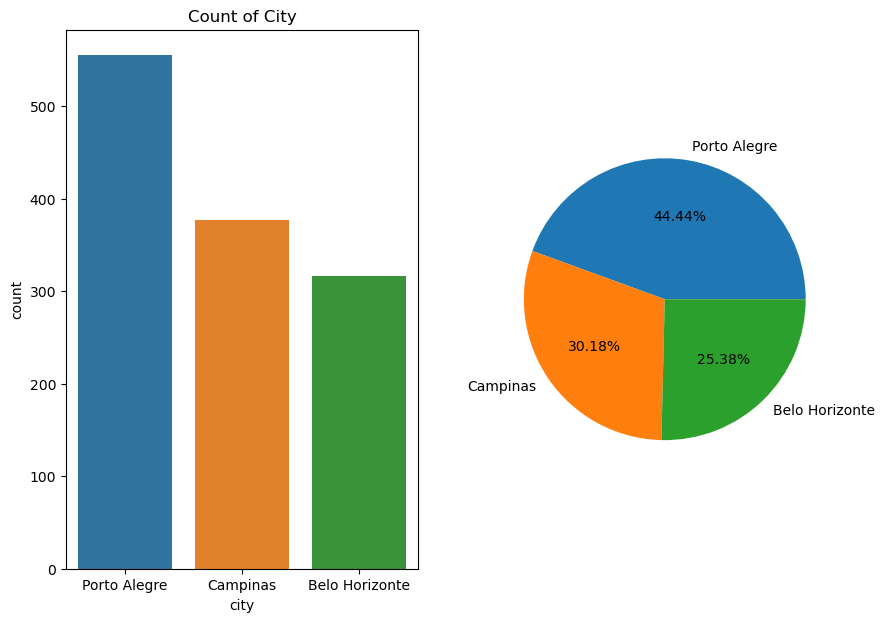

In [42]:
#Analysing city based on conditions for Bachelors.
fig, ax = plt.subplots(1,2, figsize=(10,7))
ax[0].set_title('Count of City')
percentage = DF['city'].value_counts()
labels = list(DF['city'].value_counts().index)

sns.countplot(x=DF['city'], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%.2f%%")
plt.show()

__Interpretation :__   
1. 'Porto Alegre' city is Best for Bachelors and Mid-family because it has high count which is 44.44% than Campinas and Belo Horizonte city.   
2. In this city, mostly rooms are not furnished, it includes max 2 rooms, rent amount is less than R$ 2500, bathrooms are max 2.   
3. Based on this all conditions, 'Porto Alegre' city is Best for Bachelors and Mid-family.

In [38]:
Df = data[(data.furniture == 'furnished') & 
          (data.rooms >= 3) & 
          (data['rent amount (R$)'] > 2500) & 
          (data.bathroom >=3) & 
          (data.animal == 'acept')]
Df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
91,Porto Alegre,350,4,4,4,0,acept,furnished,1,9000,359,160,9520
241,Belo Horizonte,570,5,6,7,0,acept,furnished,0,8330,873,137,9340
490,Porto Alegre,360,3,4,3,5,acept,furnished,4000,13200,500,193,17890
515,Porto Alegre,110,3,3,2,5,acept,furnished,1300,4000,300,59,5659
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10342,Belo Horizonte,300,4,4,4,17,acept,furnished,1200,7500,436,100,9236
10353,Campinas,437,3,6,6,0,acept,furnished,1200,13500,711,203,15610
10448,Porto Alegre,190,4,3,1,0,acept,furnished,0,6450,117,85,6652
10487,Porto Alegre,135,4,4,1,6,acept,furnished,1300,3200,300,47,4847


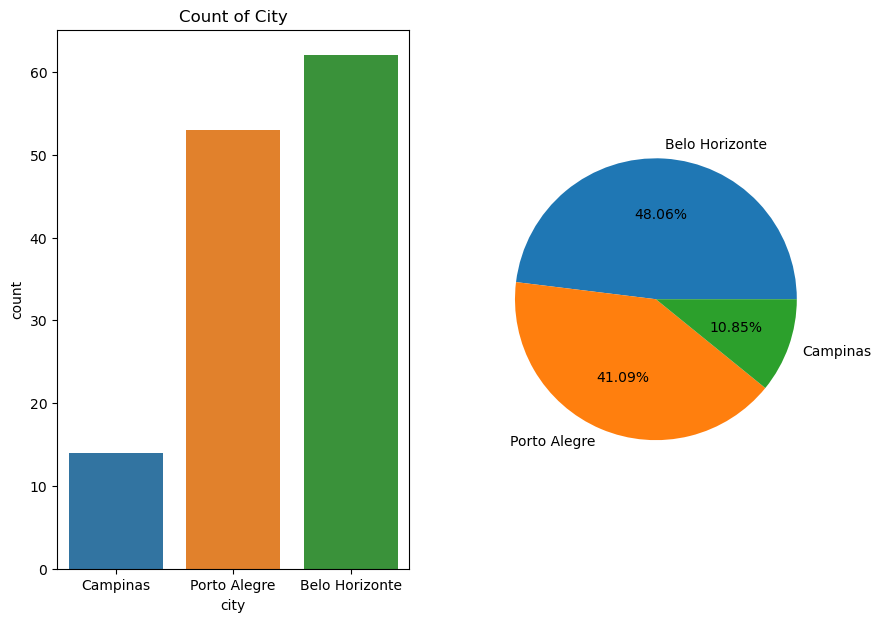

In [40]:
#Analysing city based on conditions for Big-family
fig, ax = plt.subplots(1,2, figsize=(10,7))
ax[0].set_title('Count of City')
percentage = Df['city'].value_counts()
labels = list(Df['city'].value_counts().index)

sns.countplot(x=Df['city'], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%.2f%%")
plt.show()

__Interpretation :__   
1. 'Belo Horizonte' city is Best for Big-family because it has the high count which is 48.06% than Campinas and Porto Alegre city.   
2. In this city, the rooms are furnished and availability of rooms is greater than 3 rooms.   
3. Because there are greater than 3 rooms, then the rent amount should be greater than R$ 2500.   
4. Big-family accpet the animal. So, Based on this all condtions, 'Belo Horizonte' city is for Big-family.   
5. 'Porto Alegre' city has the second high count and if some Mid-family wants same conditions like Big-family, then 'Porto Alegre' city is Best for Mid-family.